The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

> Number of Instances: 45211

> Number of Attributes: 16 + output attribute.


The classification goal is to predict if the client will subscribe a term deposit (variable y).


# Attribute information:
   Input variables:
  
   ## bank client data:
   
   1 - age (numeric)
  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
  
   6 - balance: average yearly balance, in euros (numeric) 
  
   7 - housing: has housing loan? (binary: "yes","no")
  
   8 - loan: has personal loan? (binary: "yes","no")
  
   ## related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ## other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = '/content/drive/My Drive/Datasets/Bank Marketing Data Set/bank-full.csv'
df  = pd.read_csv(path,sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Dropping useless columns
df.drop(['contact','day','month'],axis=1,inplace = True)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


In [7]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
dfgrouped = df.groupby('y')

In [9]:
for type,data in dfgrouped:
  print(type)
  print('--------------')
  print(data)

no
--------------
       age           job  marital  education  ... pdays  previous poutcome   y
0       58    management  married   tertiary  ...    -1         0  unknown  no
1       44    technician   single  secondary  ...    -1         0  unknown  no
2       33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3       47   blue-collar  married    unknown  ...    -1         0  unknown  no
4       33       unknown   single    unknown  ...    -1         0  unknown  no
...    ...           ...      ...        ...  ...   ...       ...      ...  ..
45194   59    management  married   tertiary  ...   187         5  failure  no
45198   37    management  married   tertiary  ...    -1         0  unknown  no
45199   34   blue-collar   single  secondary  ...   530        12    other  no
45209   57   blue-collar  married  secondary  ...    -1         0  unknown  no
45210   37  entrepreneur  married  secondary  ...   188        11    other  no

[39922 rows x 14 columns]
yes
---

In [10]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

  sns.set_style(palette_style)
  sns.set_palette(palette_color)

  plt.barh(array.index, width = array.values, height = .5)
  plt.yticks(np.arange(len(array)))
  plt.xticks( range(0, round(max(array)) +bias, incrementer ))

  for index, value in enumerate(array.values):
    plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

  #plt.show()
  return plt

In [11]:
def feature_perc(feature,groupby= 'yes'):

  count = dfgrouped.get_group(groupby)[feature].value_counts()
  total_count = df[feature].value_counts()[count.index]

  perc = (count/total_count)*100
  return perc 

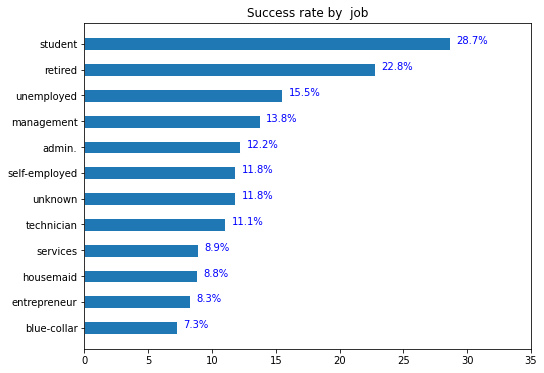

In [12]:
yes_job_perc = feature_perc('job')

plt.figure(figsize=(8,6))
plt.title('Success rate by  job')
plot_barh(yes_job_perc.sort_values(),5,10, text_color = 'blue')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

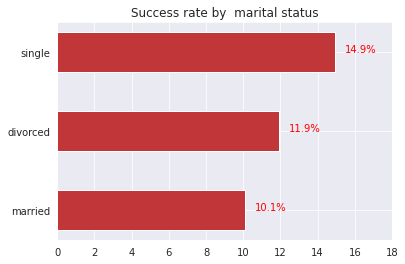

In [13]:
yes_marital_perc = feature_perc('marital')

plt.title('Success rate by  marital status')
plot_barh(yes_marital_perc.sort_values(),2,4, text_color = 'red',palette_color='dark')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

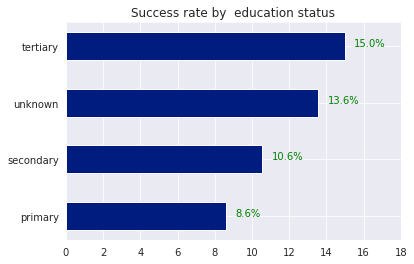

In [14]:
yes_marital_perc = feature_perc('education')

plt.title('Success rate by  education status')
plot_barh(yes_marital_perc.sort_values(),2,4, text_color = 'green',palette_color='Oranges')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

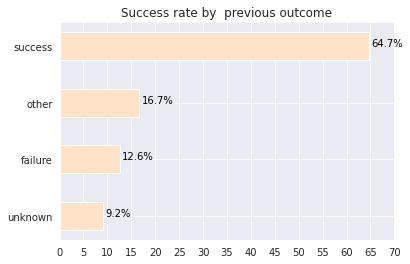

In [15]:
yes_potcome_perc = feature_perc('poutcome')

plt.title('Success rate by  previous outcome')
plot_barh(yes_potcome_perc.sort_values(),5,10, text_color = 'black',palette_color='dark')

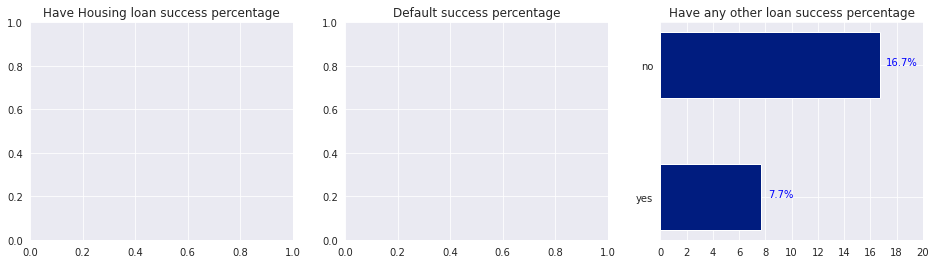

In [16]:
yes_housing_perc = feature_perc('housing')
yes_default_perc = feature_perc('default')
yes_loan_perc = feature_perc('loan')

fig, axes = plt.subplots(1,3, figsize=(16,4))

axes[0].set_title('Have Housing loan success percentage')
axes[0] = plot_barh( yes_housing_perc.sort_values(), 2, 5)

axes[1].set_title('Default success percentage')
axes[1] = plot_barh( yes_default_perc.sort_values(), 2, 5)

axes[2].set_title('Have any other loan success percentage')
axes[2] = plot_barh( yes_loan_perc.sort_values(), 2, 5)

#plt.show()

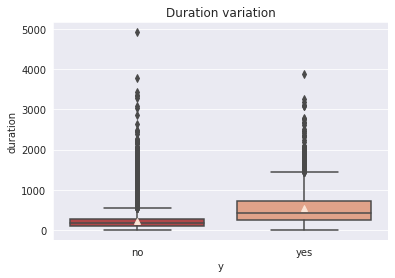

In [17]:
sns.boxplot(x='y', y='duration', data =df, showmeans=True)
plt.title('Duration variation')

plt.show()

In [18]:
df.drop(df[df['duration']>4000].index,  inplace =True)

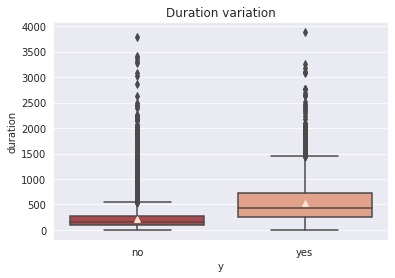

In [19]:
sns.boxplot(x='y', y='duration', data =df, showmeans=True)
plt.title('Duration variation')

plt.show()

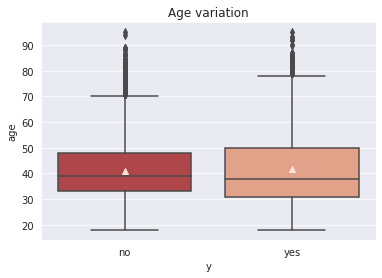

In [20]:
sns.boxplot(x='y', y='age', data =df, showmeans=True )
plt.title('Age variation')

plt.show()

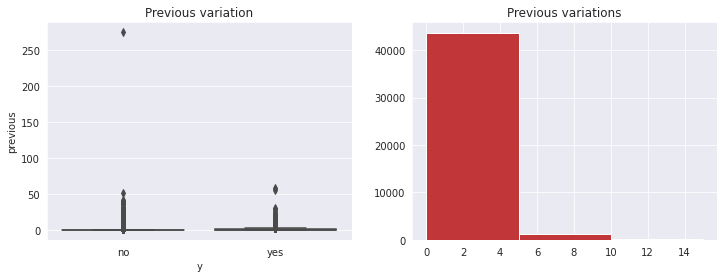

In [21]:
fig, axes = plt.subplots(1,2, figsize =(12,4))

sns.boxplot(x='y', y='previous', data =df, ax=axes[0])
axes[0].set_title('Previous variation')

axes[1].hist(df['previous'], bins=[0,5,10,15] )
axes[1].set_title('Previous variations')
plt.show()

In [22]:
45000/9


5000.0

In [23]:
df.drop( df[df.previous>100].index, inplace=True)

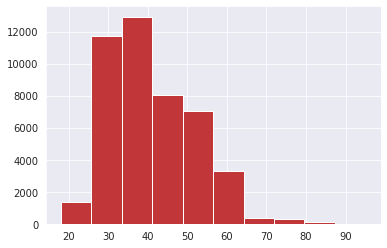

In [24]:
plt.hist(df.age)
plt.show()

In [25]:
df.balance.describe()

count     45209.000000
mean       1362.174921
std        3044.732112
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

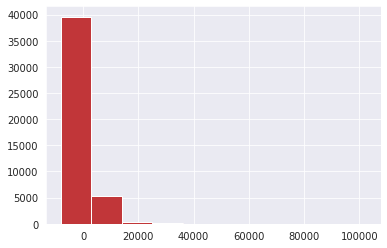

In [26]:
plt.hist(df.balance)
plt.show()

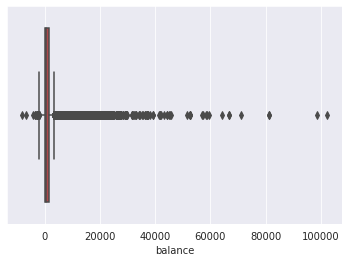

In [27]:
sns.boxplot('balance', data=df)

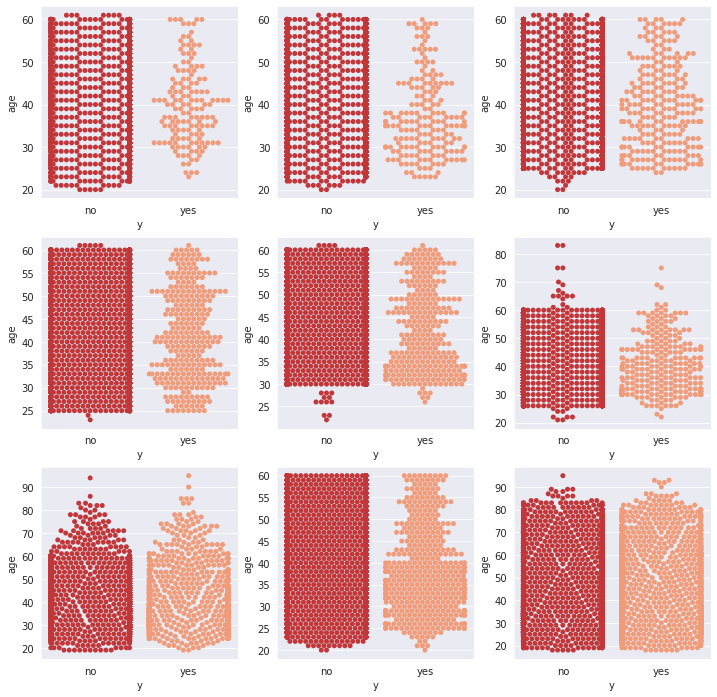

In [28]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(3,3, figsize = (12,12))

sns.swarmplot(x='y', y='age', data=df.iloc[:5000], ax= ax[0,0])
sns.swarmplot(x='y', y='age', data=df.iloc[5001:10000], ax= ax[0,1])
sns.swarmplot(x='y', y='age', data=df.iloc[10001:15000], ax= ax[0,2])
sns.swarmplot(x='y', y='age', data=df.iloc[15001:20000], ax= ax[1,0])
sns.swarmplot(x='y', y='age', data=df.iloc[20001:25000], ax= ax[1,1])
sns.swarmplot(x='y', y='age', data=df.iloc[25001:30000], ax= ax[1,2])
sns.swarmplot(x='y', y='age', data=df.iloc[30001:35000], ax= ax[2,0])
sns.swarmplot(x='y', y='age', data=df.iloc[35001:40000], ax= ax[2,1])
sns.swarmplot(x='y', y='age', data=df.iloc[40001:], ax= ax[2,2])

plt.show()

In [29]:
df['y'] = df.y.apply(lambda x:0 if x=='no' else 1)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,0


In [31]:
dummy_features = ['job','marital','education','default','housing','loan','poutcome']
df1 = pd.get_dummies(df[dummy_features])
df2 = pd.concat([df.drop(dummy_features,axis=1),df1],axis=1)

In [32]:
df2.head()

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1


In [33]:
df2.corr()['y'].sort_values()

poutcome_unknown      -0.167073
housing_yes           -0.139161
campaign              -0.073179
job_blue-collar       -0.072092
loan_yes              -0.068193
marital_married       -0.060248
education_primary     -0.040400
education_secondary   -0.036405
job_services          -0.027869
default_yes           -0.022421
job_entrepreneur      -0.019665
job_housemaid         -0.015198
job_technician        -0.008956
job_unknown            0.000265
job_self-employed      0.000852
marital_divorced       0.002767
job_admin.             0.005632
poutcome_failure       0.009880
education_unknown      0.012050
job_unemployed         0.020387
default_no             0.022421
age                    0.025169
poutcome_other         0.032001
job_management         0.032932
balance                0.052852
marital_single         0.063516
education_tertiary     0.066477
loan_no                0.068193
job_student            0.076895
job_retired            0.079242
pdays                  0.103642
previous

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('y',axis=1),
                                                    df2['y'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= df2['y'])

In [36]:
stsc = StandardScaler()
s_X_train = stsc.fit_transform(X_train)
s_X_test = stsc.transform(X_test)

In [37]:
model = LogisticRegression()
#model = SVC()
#model = RandomForestClassifier()
model.fit(s_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
model.score(s_X_train,y_train)

0.9004297541553435

In [39]:
model.score(s_X_test,y_test)

0.8995060089950601

In [40]:
confusion_matrix(y_train, model.predict(s_X_train))

array([[27309,   635],
       [ 2516,  1186]])

In [41]:
print(classification_report(y_train, model.predict(s_X_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27944
           1       0.65      0.32      0.43      3702

    accuracy                           0.90     31646
   macro avg       0.78      0.65      0.69     31646
weighted avg       0.88      0.90      0.89     31646



In [42]:
confusion_matrix(y_test, model.predict(s_X_test))

array([[11709,   267],
       [ 1096,   491]])

In [43]:
print(classification_report(y_test, model.predict(s_X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11976
           1       0.65      0.31      0.42      1587

    accuracy                           0.90     13563
   macro avg       0.78      0.64      0.68     13563
weighted avg       0.88      0.90      0.88     13563



In [63]:
accuracy_score(y_test, model.predict(s_X_test))

NameError: ignored

#After Feature Engineering

In [44]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,361,2,188,11,other,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45209 non-null  int64 
 1   job        45209 non-null  object
 2   marital    45209 non-null  object
 3   education  45209 non-null  object
 4   default    45209 non-null  object
 5   balance    45209 non-null  int64 
 6   housing    45209 non-null  object
 7   loan       45209 non-null  object
 8   duration   45209 non-null  int64 
 9   campaign   45209 non-null  int64 
 10  pdays      45209 non-null  int64 
 11  previous   45209 non-null  int64 
 12  poutcome   45209 non-null  object
 13  y          45209 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [46]:
bins = [0,18,30,60,100]
labels = ['student','young','mature','old']
df['age_grouped'] = pd.cut(df.age, bins=bins, labels = labels)
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,age_grouped
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,0,mature
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,0,mature
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,0,mature
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,0,mature
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,0,mature


In [47]:
df.age_grouped.value_counts()

mature     36991
young       7018
old         1188
student       12
Name: age_grouped, dtype: int64

In [48]:
df.balance.describe()

count     45209.000000
mean       1362.174921
std        3044.732112
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [49]:
bins = [-8020,0,72,1428,102128]
labels= ['very poor','poor','middle','rich']
df['balance_grouped'] = pd.cut(df.balance, bins=bins, labels=labels)
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,age_grouped,balance_grouped
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,0,mature,rich
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,0,mature,poor
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,0,mature,poor
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,0,mature,rich
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,0,mature,poor


In [50]:
df.balance_grouped.value_counts()

middle       22596
rich         11296
very poor     7280
poor          4037
Name: balance_grouped, dtype: int64

In [51]:
df.drop(['age','balance'], axis=1, inplace=True)

In [52]:
df.rename(columns={'age_grouped':'age', 'balance_grouped':'balance'}, inplace=True)
df['age'] = df.age.astype('object')
df['balance'] = df.balance.astype('object')
df.head()

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,y,age,balance
0,management,married,tertiary,no,yes,no,261,1,-1,0,unknown,0,mature,rich
1,technician,single,secondary,no,yes,no,151,1,-1,0,unknown,0,mature,poor
2,entrepreneur,married,secondary,no,yes,yes,76,1,-1,0,unknown,0,mature,poor
3,blue-collar,married,unknown,no,yes,no,92,1,-1,0,unknown,0,mature,rich
4,unknown,single,unknown,no,no,no,198,1,-1,0,unknown,0,mature,poor


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45209 non-null  object
 1   marital    45209 non-null  object
 2   education  45209 non-null  object
 3   default    45209 non-null  object
 4   housing    45209 non-null  object
 5   loan       45209 non-null  object
 6   duration   45209 non-null  int64 
 7   campaign   45209 non-null  int64 
 8   pdays      45209 non-null  int64 
 9   previous   45209 non-null  int64 
 10  poutcome   45209 non-null  object
 11  y          45209 non-null  int64 
 12  age        45209 non-null  object
 13  balance    45209 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [54]:
for col in df.columns:
  if df[col].dtype == 'object':
    df1 = pd.get_dummies(df[col],drop_first= True)
    df = pd.concat([df.drop(col,axis=1),df1],axis=1)
df.head()

,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown,yes,yes,yes,other,success,unknown,old,student,young,poor,rich,very poor
0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
3,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
4,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


## ML Model Building

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [56]:
X_train, X_test, y_train, y_test  = train_test_split(
                                    df.drop('y', axis=1), df['y'], test_size=.25, random_state = 0, stratify= df['y'])

In [65]:
#model = LogisticRegression()
#model = DecisionTreeClassifier()
model = RandomForestClassifier()
#model = SVC

In [66]:
steps = [('scaler', StandardScaler()),
         ('model', model)]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [67]:
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [68]:
print('confusion matrix for training data:')
print(confusion_matrix(y_train, pipeline.predict(X_train)))
print('==============================')
print('confusion matrix for testing data:')
print(confusion_matrix(y_test, pipeline.predict(X_test)))

confusion matrix for training data:
[[29930     9]
 [   46  3921]]
confusion matrix for testing data:
[[9534  447]
 [ 825  497]]


In [69]:
print('classification report for training data:')
print(classification_report(y_train, pipeline.predict(X_train)))
print('==============================')
print('classification report for testing data:')
print(classification_report(y_test, pipeline.predict(X_test)))

classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29939
           1       1.00      0.99      0.99      3967

    accuracy                           1.00     33906
   macro avg       1.00      0.99      1.00     33906
weighted avg       1.00      1.00      1.00     33906

classification report for testing data:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9981
           1       0.53      0.38      0.44      1322

    accuracy                           0.89     11303
   macro avg       0.72      0.67      0.69     11303
weighted avg       0.87      0.89      0.88     11303



In [70]:
accuracy_score(y_test, pipeline.predict(X_test))

0.8874635052640891